### Importing Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

### Reading the dataset

In [2]:
df = pd.read_csv("raw/ObesityDataSet_raw_and_data_sinthetic.csv")

### Intial Data Exploration

Let's take a look at the dataset to understand its structure:

In [23]:
df.shape

(2087, 17)

In [3]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Understanding Column Abbreviations

FAVC: Frequency of high-calorie food consumption 

FCVC: Frequency of vegetable consumption

NCP: Number of main meals

CAEC: Consumption of food between meals

CH2O: Consumption of water

SCC: Calories consumption monitoring

FAF: Physical activity frequency

TUE: Time using technology

CALC: Consumption of alcohol

MTRANS: Transportation used

NObeyesdad: Level of obesity


### Identifying and Removing Duplicate Entries

In [13]:
duplicate_count = df.duplicated().sum()
display(duplicate_count)

24

In [14]:
df = df.drop_duplicates()

In [24]:
df.shape

(2087, 17)

In [25]:
df.to_csv("cleaned_data.csv", index=False)

### Identifying Missing Values

In [9]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
display(missing_data)

,Missing Values,Percentage
Gender,0,0.0
Age,0,0.0
Height,0,0.0
Weight,0,0.0
family_history_with_overweight,0,0.0
FAVC,0,0.0
FCVC,0,0.0
NCP,0,0.0
CAEC,0,0.0
SMOKE,0,0.0


### Summary Statistics

Getting summary statistics of the numerical features to understand data distribution

In [15]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


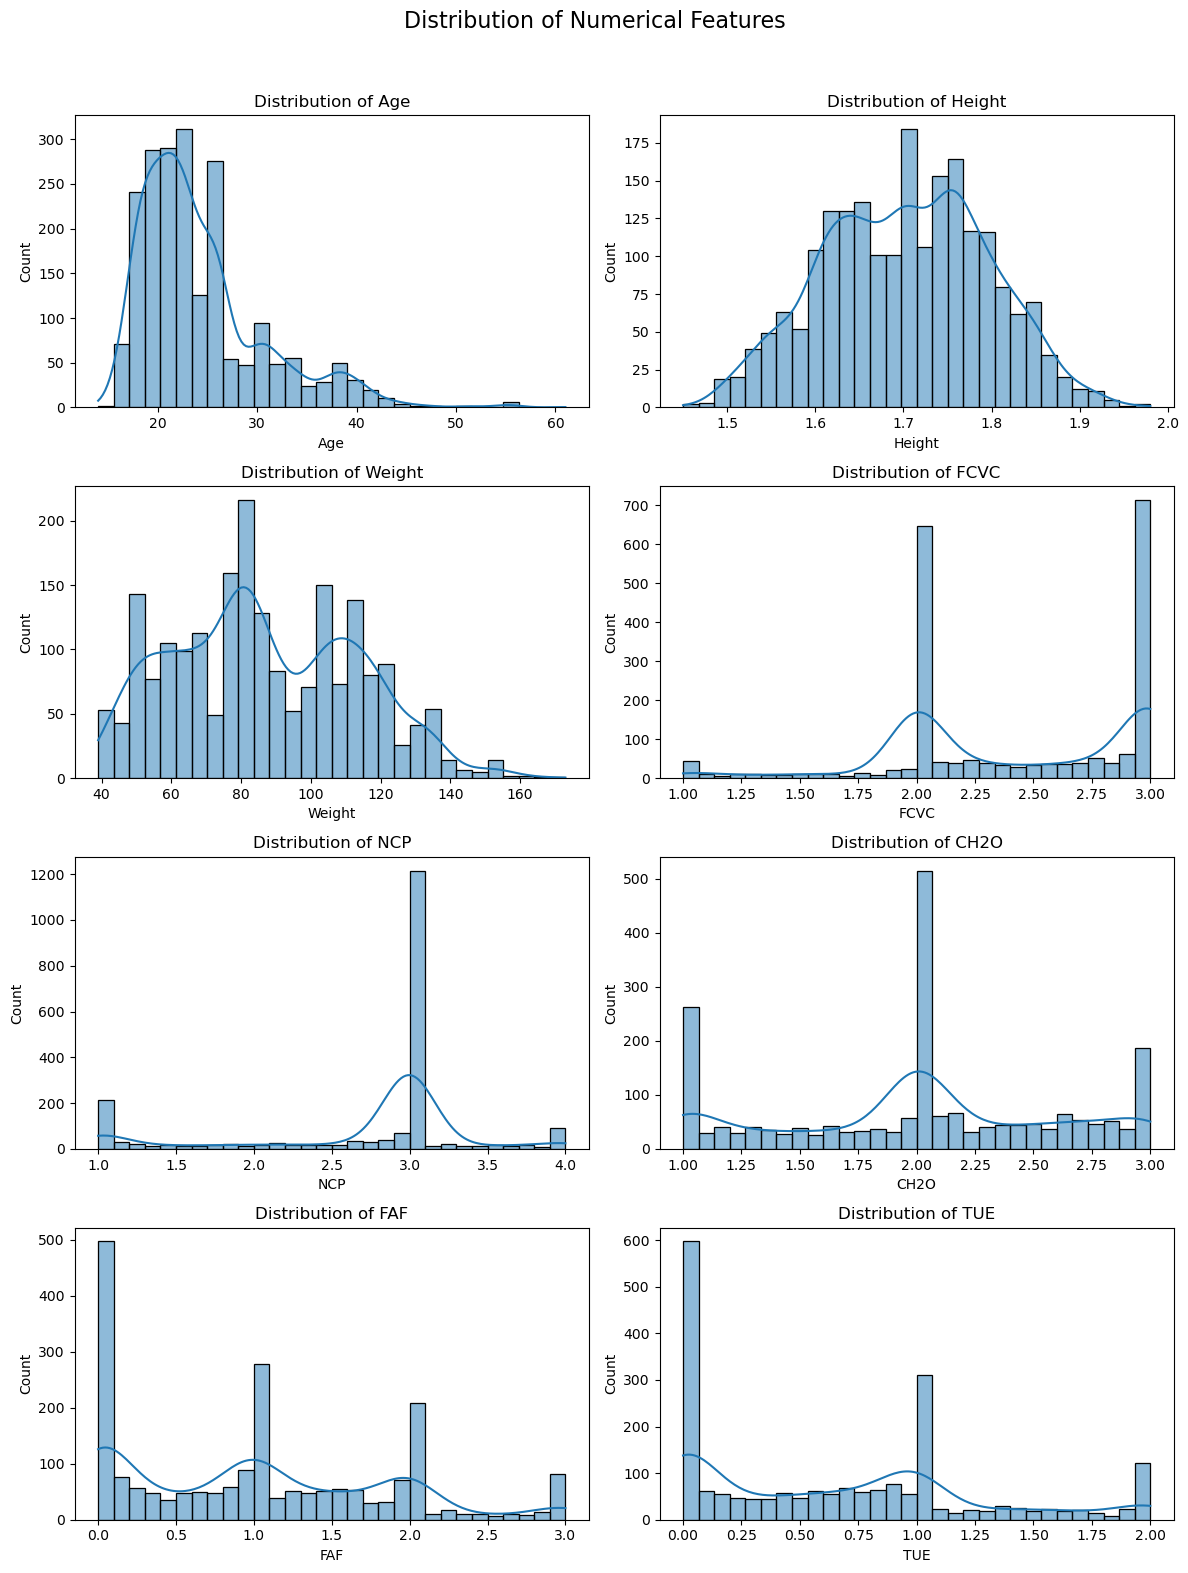

In [16]:
# Distribution of numerical variables
numerical_features = df.select_dtypes(include=["number"]).columns
fig, axes = plt.subplots(nrows=len(numerical_features) // 2, ncols=2, figsize=(12, 16))
fig.suptitle("Distribution of Numerical Features", fontsize=16)

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribution of {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Identifying Outliers

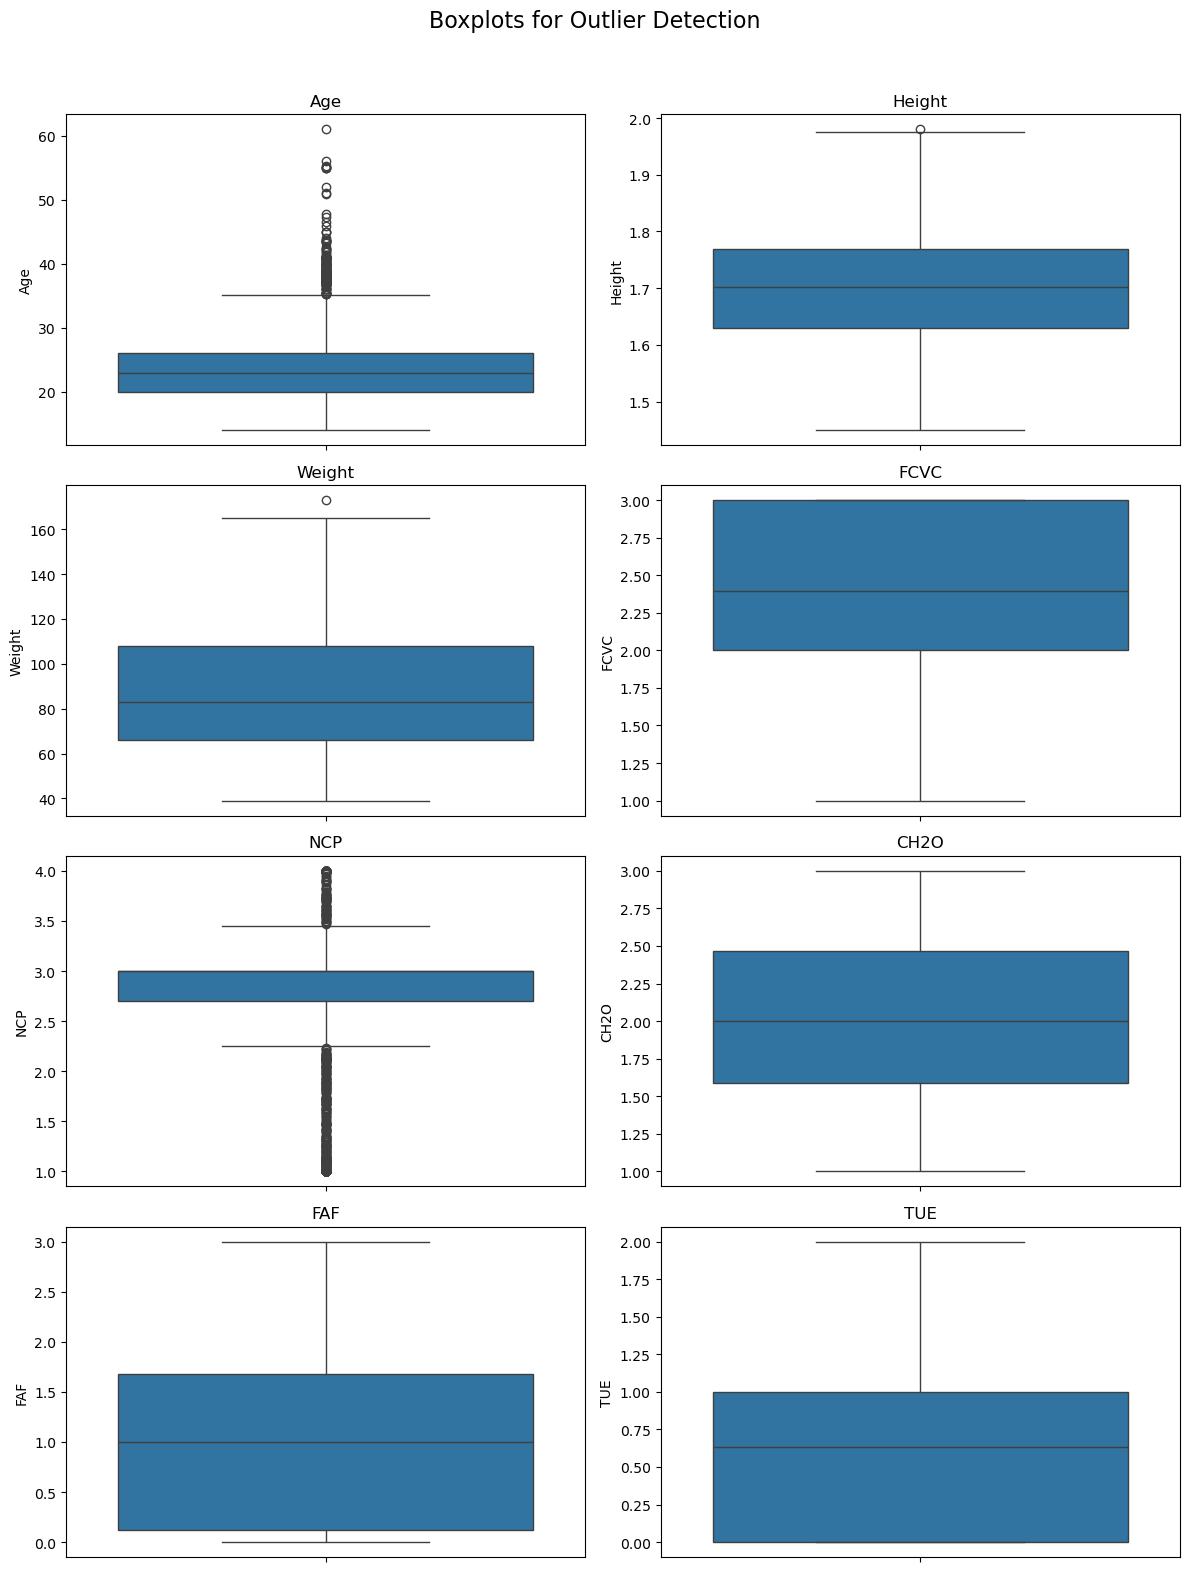

In [20]:

# Identifying outliers using the IQR method
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).sum()

# Visualizing outliers using boxplots
fig, axes = plt.subplots(nrows=len(numerical_features) // 2, ncols=2, figsize=(12, 16))
fig.suptitle("Boxplots for Outlier Detection", fontsize=16)

for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



We're keeping the outliers because they represent real and important variations in the data. These values can offer unique insights into specific cases or trends that are crucial for our analysis.

### Correlation Matrix Analysis

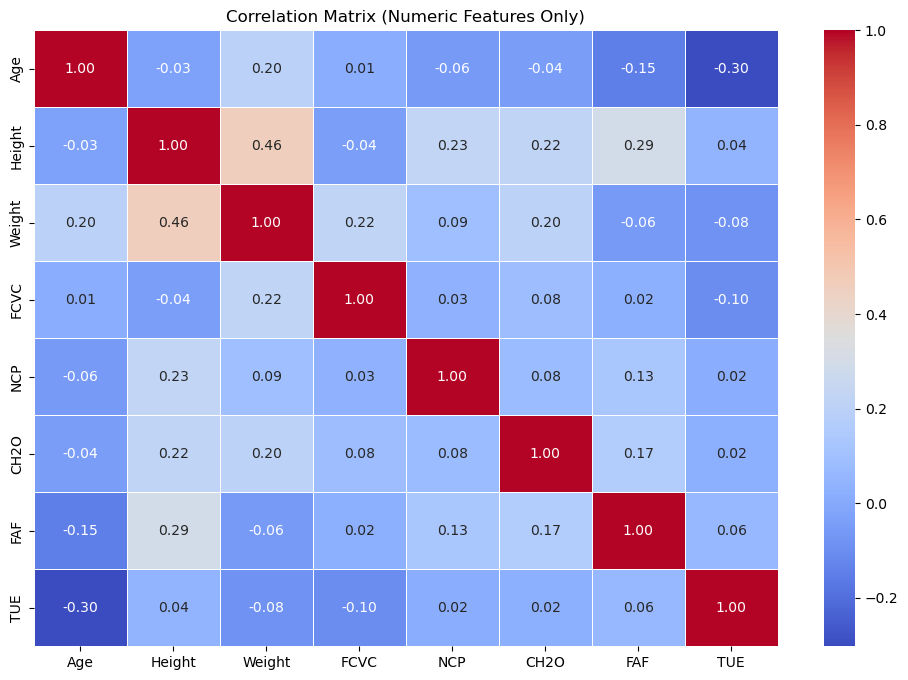

In [21]:
# Correlation matrix for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

From the correlation matrix, we can summarize the relationships between different numeric features:

Age:

Negatively correlated with TUE (-0.30) and FAF (-0.15).
Weak positive correlation with Weight (0.20).
Minimal correlation with other variables.

Height:

Moderately positively correlated with Weight (0.46).
Weak positive correlation with NCP (0.23) and FAF (0.29).
Minimal correlation with other variables.

Weight:

Positively correlated with Height (0.46) and FCVC (0.22).
Weak correlation with CH2O (0.20).
Minimal correlation with other variables.

FCVC (Frequency of consumption of vegetables):

Weak positive correlation with Weight (0.22).
Negligible correlation with other variables.

NCP (Number of main meals per day):

Weak positive correlation with Height (0.23).
Minimal correlation with other variables.

CH2O (Daily water consumption):

Weak positive correlation with Weight (0.20) and FAF (0.17).
Minimal correlation with other variables.

FAF (Physical activity frequency per week):

Weak positive correlation with Height (0.29).
Weak negative correlation with Age (-0.15).
Minimal correlation with other variables.

TUE (Time spent using technology devices):

Negatively correlated with Age (-0.30).
Minimal correlation with other variables.


Key Insights:
Weight and Height are the most strongly correlated variables (0.46), which is expected.

Age has a negative correlation with TUE (-0.30), suggesting that younger individuals tend to use technology devices more.

Most other correlations are weak or negligible, indicating that the numeric features in this dataset do not have strong linear relationships.

### Class Imbalance Analysis

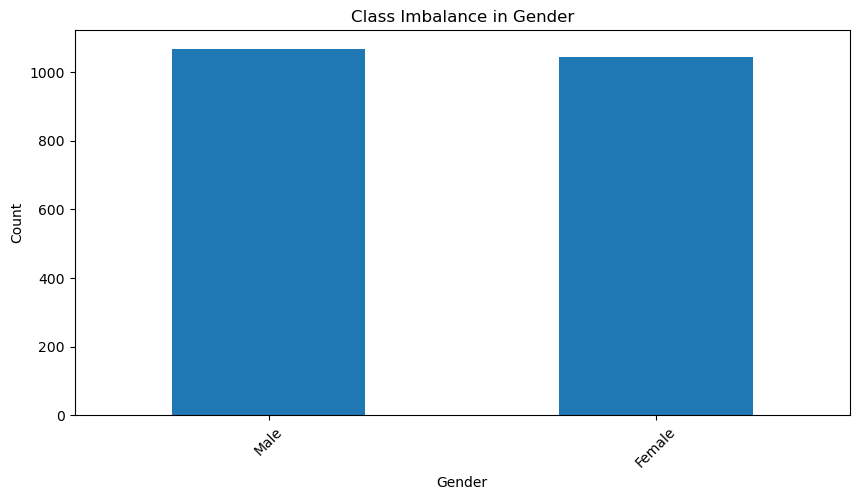

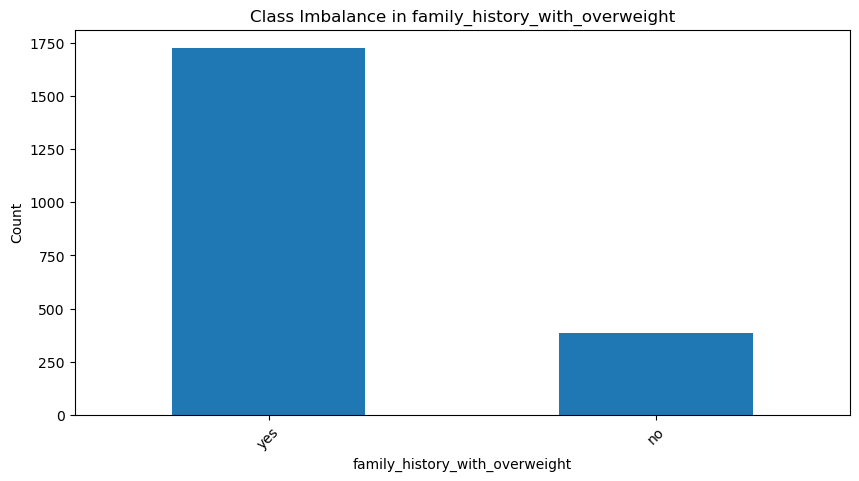

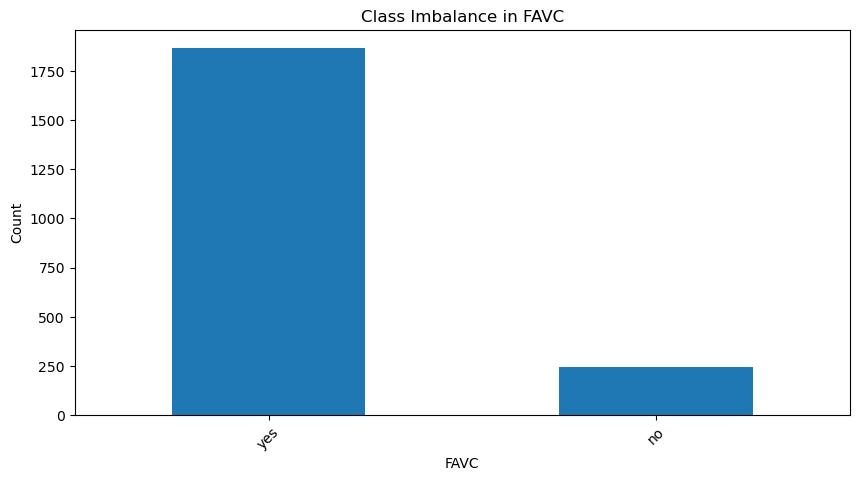

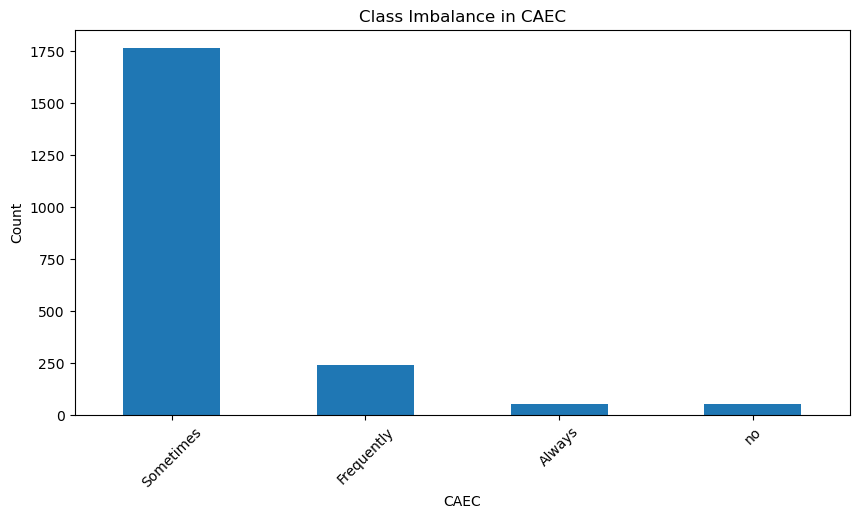

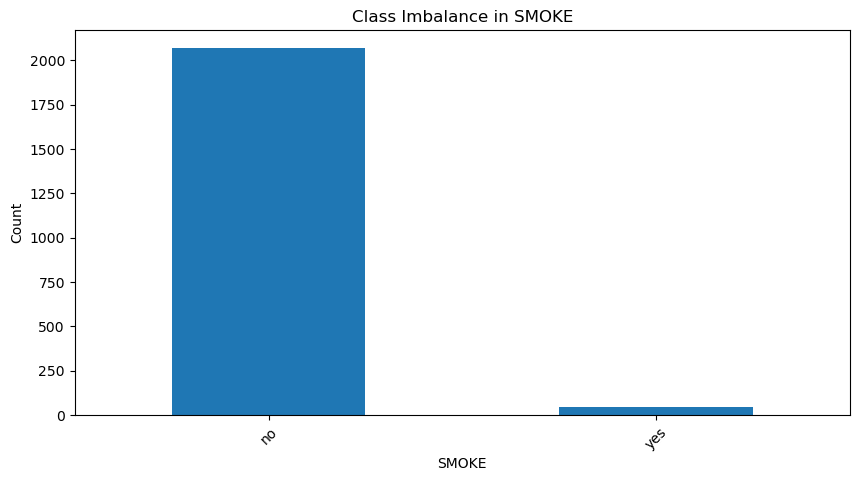

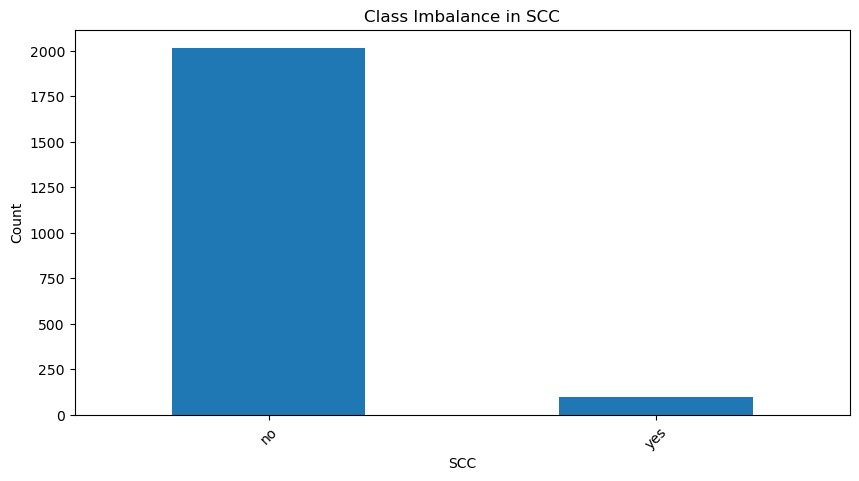

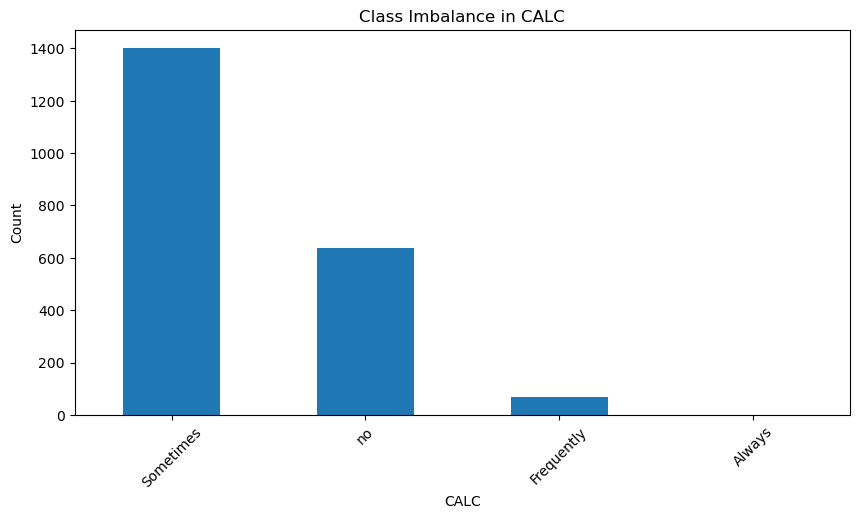

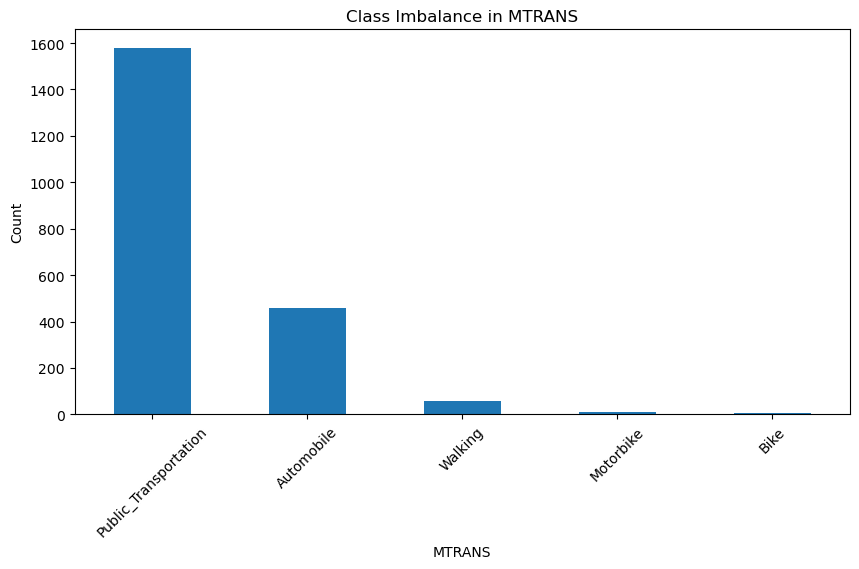

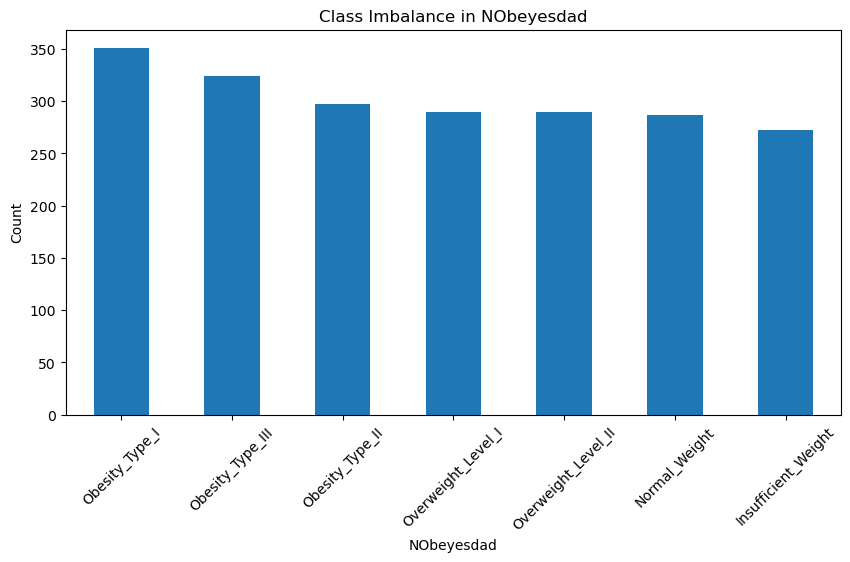

In [ ]:
# Get class distribution for each categorical column
categorical_columns = df.select_dtypes(include=["object"]).columns

# Create plots for each categorical column
for column in categorical_columns:
    class_counts = df[column].value_counts()

    # Plot class distribution
    plt.figure(figsize=(10, 5))
    class_counts.plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Class Imbalance in {column}")
    plt.xticks(rotation=45)
    plt.show()

The class imbalance will be addressed in the data preprocessing stage.